In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [39]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')


In [40]:
raw_train.relative_time /= np.max(raw_train.relative_time)
raw_train.energy_deposit /= np.max(raw_train.energy_deposit) 
raw_test.relative_time /= np.max(raw_train.relative_time)
raw_test.energy_deposit /= np.max(raw_train.energy_deposit)



In [7]:
def to_features(raw_data,test=False):    
    
    
    data_sb = raw_data[raw_data.energy_deposit>0]

    features = {}
    #features["time"] = np.array(data_sb.relative_time)
    #features["enrg"] = np.array(data_sb.energy_deposit)
    
    features["timesq"] = np.array(data_sb.relative_time)**2
    features["enrgsqlog"] = np.log(np.array(data_sb.energy_deposit))**2
    
    n_wires = 4482
    n_discretes=50
    #for i in range(n_discretes):
    #    features['w'+str(i)] = (data_sb.wire_id%n_discretes)==i

    wires_per_discrete = (n_wires-1)/n_discretes +1
    #print 'wpd:',wires_per_discrete
    #for i in range(n_discretes):
    #    section = wires_per_discrete*i
    #    features['w'+str(i)] = np.logical_and(data_sb.wire_id >= section, data_sb.wire_id < section+wires_per_discrete)

        
    #features["mul"] = features["enrg"]*features["time"]
    
    #features["invlogenrg"] = np.log(1./(np.array(data_sb.energy_deposit)+0.01))
    #features["invlogtime"]=np.log(1./(np.array(data_sb['relative_time'])+0.01))
    #features["mul"] = features["invlogenrg"]*features["invlogtime"]
    #features["wire"] = data_sb.wire_id

    return (pd.DataFrame(features),data_sb.global_id ) if test else (pd.DataFrame(features),data_sb.label==1)

Xfeat,Y=to_features(raw_train)
data_test,ids_test = to_features(raw_test,test=True)

In [19]:
Xfeat.shape

(1173167, 24)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=2)
rf.fit(Xfeat,Y)

[Parallel(n_jobs=-1)]: Done   1 out of 100 | elapsed:   11.6s remaining: 19.2min
[Parallel(n_jobs=-1)]: Done  51 out of 100 | elapsed:  2.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [20]:
Y_test = rf.predict_proba(data_test)[:,1]

ans = pd.DataFrame({"prediction":Y_test},index=ids_test)
ans.to_csv("subm.csv",index_label="global_id")

[Parallel(n_jobs=4)]: Done   1 out of 100 | elapsed:    0.5s remaining:   48.9s
[Parallel(n_jobs=4)]: Done  51 out of 100 | elapsed:    3.5s remaining:    3.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   21.6s finished


(array([  4.69000000e+02,   3.85890000e+04,   1.39268000e+05,
          1.72370000e+05,   2.43242000e+05,   2.93997000e+05,
          2.43823000e+05,   6.53610000e+04,   1.00990000e+04,
          2.57000000e+02]),
 array([ 0.02 ,  0.086,  0.152,  0.218,  0.284,  0.35 ,  0.416,  0.482,
         0.548,  0.614,  0.68 ]),
 <a list of 10 Patch objects>)

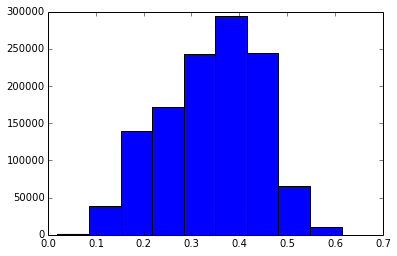

In [24]:
plt.hist(Y_test)

In [ ]:
from sklearn.externals import joblib
!mkdir dumps
joblib.dump(rf,'dumps/rf0-500')

In [32]:
4482*1700,len(raw_train)

(7619400, 7619400)

In [35]:
in_train = np.arange(4482*1000)
in_test = np.arange(4482*1000,4482*1700)

Xtr,Ytr = extract_features(raw_train.irow(in_train),pca)
Xts,Yts = extract_features(raw_train.irow(in_test),pca)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(Xtr,Ytr)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
from sklearn.metrics import roc_auc_score
Yts_pred = clf.predict_proba(Xts)[:,1]
roc_auc_score(Yts==1,Yts_pred)

0.98358507829089259

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5,learning_rate=0.1)
gb.fit(Xtr,Ytr)
from sklearn.metrics import roc_auc_score
Yts_pred = gb.predict_proba(Xts)[:,1]
roc_auc_score(Yts==1,Yts_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
gb = GradientBoostingClassifier(n_estimators=3,)
pdict = {
    'max_depth':[3,5],
    'learning_rate': [0.05,0.1,0.25]
}
gcv = GridSearchCV(gb, pdict,scoring = 'roc_auc',n_jobs=-1)
gcv.fit(Xtr,Ytr)
Yts_pred = gcv.best_estimator_.predict(Xts)
from sklearn.metrics import roc_auc_score
roc_auc_score(Yts==1,Yts_pred==1)

In [6]:
data

NameError: name 'data' is not defined

In [4]:
def group_by_event(data,n_wires= 4482):

    len_events = data.shape[0]/n_wires
    #ASSUME IT GOES IN A (event_id, wire_id)-lexicographic order
    return data.reshape((len_events,n_wires))

imgs_e = group_by_event(np.append(raw_train.energy_deposit,raw_test.energy_deposit))
imgs_t = group_by_event(np.append(raw_train.relative_time,raw_test.relative_time))

In [5]:
imgs = np.hstack([imgs_e,imgs_t])
imgs.shape

(3445, 8964)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(imgs)



PCA(copy=True, n_components=20, whiten=False)

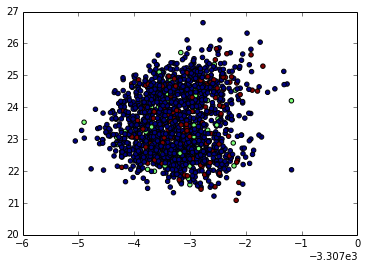

In [21]:
imgs_e_train = group_by_event(raw_train.energy_deposit)
imgs_t_train = group_by_event(raw_train.relative_time)
imgs_train = np.hstack([imgs_e_train,imgs_t_train])

evt_transformed = pca.transform(imgs_train)

In [7]:
wires = pd.DataFrame.from_csv("wires.csv")
wires

,wire_rho,wire_phi
wire_id,,
0,53.0,0.000000
1,53.0,0.031733
2,53.0,0.063467
3,53.0,0.095200
4,53.0,0.126933
5,53.0,0.158666
6,53.0,0.190400
7,53.0,0.222133
8,53.0,0.253866


In [41]:
def extract_features(data,preproc,test=False):
    imgs_e = group_by_event(data.energy_deposit)
    imgs_t = group_by_event(data.relative_time)
    imgs = np.hstack([imgs_e,imgs_t])
    pc = preproc.transform(imgs) #eventid -> components
    
    data_sb = data[data.energy_deposit>0]

    
    wires = pd.DataFrame.from_csv("wires.csv") #wire_id -> wire position
    
    features = {}
    
    features["timesq"] = np.array(data_sb.relative_time)**2
    features["enrgsqlog"] = np.log(np.array(data_sb.energy_deposit))**2
    
    features["wirePhi"] = wires.wire_phi[data_sb.wire_id]
    features["wireRho"] = wires.wire_rho[data_sb.wire_id]
    pc_table = pc[data_sb.event_id - np.min(data_sb.event_id)]
    for i in range(pc_table.shape[1]):
        features['w'+str(i)] = pc_table[:,i]
    
    return (pd.DataFrame(features),data_sb.global_id ) if test else (pd.DataFrame(features),data_sb.label==1)


Xfeat,Y=extract_features(raw_train,pca)
data_test,ids_test = extract_features(raw_test,pca,test=True)

In [13]:
del raw_train,raw_test

(array([  3.96322000e+05,   1.23210000e+04,   9.35100000e+03,
          1.12300000e+04,   1.40640000e+04,   1.65920000e+04,
          1.50640000e+04,   5.97300000e+03,   1.20700000e+03,
          7.30000000e+01]),
 array([ 0.   ,  0.093,  0.186,  0.279,  0.372,  0.465,  0.558,  0.651,
         0.744,  0.837,  0.93 ]),
 <a list of 10 Patch objects>)

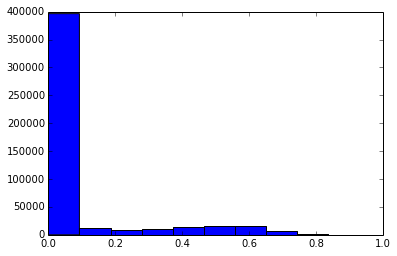

In [43]:
plt.hist(Yts_pred)